In [16]:
#Imports
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import numpy as np
import h5py
import os
import json
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
config={
    "model"           : "vgg16",
    "weights"         : "imagenet",
    "features_path"   : "C:\\Users\\nickm\\PythonProjects\\FullStackDataScience\\car_damage_check\\features.h5",
    "labels_path"     : "C:\\Users\\nickm\\PythonProjects\\FullStackDataScience\\car_damage_check\\labels.h5",
    "classifier_path" : "C:\\Users\\nickm\\PythonProjects\\FullStackDataScience\\car_damage_check\\classifier.pickle",
    "model_path"      : "C:\\Users\\nickm\\PythonProjects\\FullStackDataScience\\car_damage_check\\model",
    
    "test_size"       : 0.20,
    "seed"            : 9,
}

In [7]:
##filter warnings
import warnings

warnings.simplefilter(action="ignore", category=FutureWarning)

In [3]:
##config variables

test_size = config["test_size"]
seed = config["seed"]
features_path = config["features_path"]
labels_path = config["labels_path"]
classifier_path = config["classifier_path"]

In [4]:
##import features and labels

h5f_data = h5py.File(features_path, 'r')
h5f_label = h5py.File(labels_path, 'r')

features_string = h5f_data['dataset_1']
labels_string = h5f_label['dataset_1']

features = np.array(features_string)
labels = np.array(labels_string)

h5f_data.close()
h5f_label.close()

In [5]:
##verify the shape of features and labels
print("[INFO] features shape: {}".format(features.shape))
print("[INFO] labels shape: {}".format(labels.shape))

print("[INFO] training started...")

#splitting the data into training and test sets
(trainData, testData, trainLabels, testLabels) = train_test_split(np.array(features),
                                                                 np.array(labels),
                                                                 test_size=test_size,
                                                                 random_state=seed)

print("[INFO] spltting data into training and test sets...")
print("[INFO] train data   : {}".format(trainData.shape))
print("[INFO] test data    : {}".format(testData.shape))
print("[INFO] train labels : {}".format(trainLabels.shape))
print("[INFO] test labels  : {}".format(testLabels.shape))

[INFO] features shape: (1840, 4096)
[INFO] labels shape: (1840,)
[INFO] training started...
[INFO] spltting data into training and test sets...
[INFO] train data   : (1472, 4096)
[INFO] test data    : (368, 4096)
[INFO] train labels : (1472,)
[INFO] test labels  : (368,)


In [8]:
print("[INFO] creating model...")
model = LogisticRegression(random_state=seed)
model.fit(trainData, trainLabels)

[INFO] creating model...


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=9, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [9]:
##evalute the model on the test data
preds = model.predict(testData)

In [10]:
##dump classifier to file

print("[INFO] saving model...")
pickle.dump(model, open(classifier_path, 'wb'))

[INFO] saving model...


In [12]:
#confusion matrix
print("[INFO] confusion matrix")

#show confusion matrix
cm = confusion_matrix(testLabels, preds)
cm

[INFO] confusion matrix


array([[171,  15],
       [ 14, 168]], dtype=int64)

In [14]:
##Accuracy of model 92%!
accuracy = ((368 - (15+14))/368)*100
accuracy

92.11956521739131

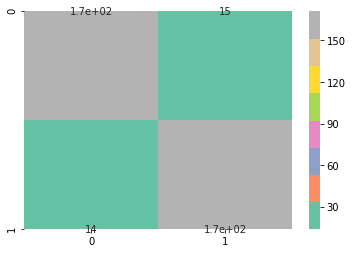

In [17]:
sns.heatmap(cm,
           annot=True,
           cmap="Set2")
plt.show()

In [ ]:
#This logistic regression classifier is a model with 92% accuracy at telling the
#difference between a damaged and undamaged car without having seen it before.